In [ ]:
#import dependancies and libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
#mounting google drive for reading cloud files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the csv into google colab
insurance_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UTA - Data Visualisation Bootcamp/23-Project-4-Week-1/Project-4/Resource/Health_insurance.csv')
insurance_df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Examining the dataframes shape and datatypes
insurance_df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [ ]:
#looking over value ranges to see if anything stands out as being out of place or above/below expected amounts
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#examining the 'sex' column for encoding needs
insurance_df.sex.describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [ ]:
#examining the 'smoker' column for encoding needs
insurance_df.smoker.describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [ ]:
#examining the 'region' column for encoding needs
insurance_df.region.describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [ ]:
#importing ploting dependancies
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#graphing ages across the dataset
age_graph = px.histogram(insurance_df, 
                   x='age', 
                   marginal='box', 
                   color_discrete_sequence=['light blue'], 
                   nbins=47, 
                   title='Ages across the dataset')
age_graph.update_layout(bargap=0.1)
age_graph.show()

In [ ]:
#graphing BMI across the data set
BMI_graph = px.histogram(insurance_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['blue'], 
                   title='BMI (Body Mass Index) across Dataset')
BMI_graph.update_layout(bargap=0.1)
BMI_graph.show()

In [ ]:
#graphing charges compared to smoking status across the dataset
charges_graph = px.histogram(insurance_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['grey', 'green'], 
                   title='smoking status relationship to charges')
charges_graph.update_layout(bargap=0.1)
charges_graph.show()

In [ ]:
#charges with children as a factor
child_charges = px.histogram(insurance_df,
                  x = 'charges',
                  marginal ="box",
                  color = 'children',
                  title = 'children relationship to charges')
child_charges.update_layout(bargap=0.3)
child_charges.show()

In [ ]:
#age relationship to charges
ages_charges = px.scatter(insurance_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.5, 
                 hover_data=['sex'], 
                 title='age relationship to charges')
ages_charges.update_traces(marker_size=5)
ages_charges.show()

In [ ]:
#bmi relationship to charges
bmi_charges = px.scatter(insurance_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=1, 
                 hover_data=['sex'], 
                 title='bmi relationship to charges')
bmi_charges.update_traces(marker_size=5)
bmi_charges.show()

In [ ]:
#encode the smoker, sex, and region columns
insurance_df['smoker'] = insurance_df['smoker'].map({'yes': 1, 'no': 0})
insurance_df['sex'] = insurance_df['sex'].map({'female': 1, 'male': 0})
insurance_df['region'] = insurance_df['region'].map({'northeast': 3, 'northwest': 2,'southeast': 1, 'southwest': 0})

insurance_df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [ ]:
#splitting features and target
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']


In [ ]:
# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

MSE:  33635210.43117845
R2 Score:  0.7833463107364536


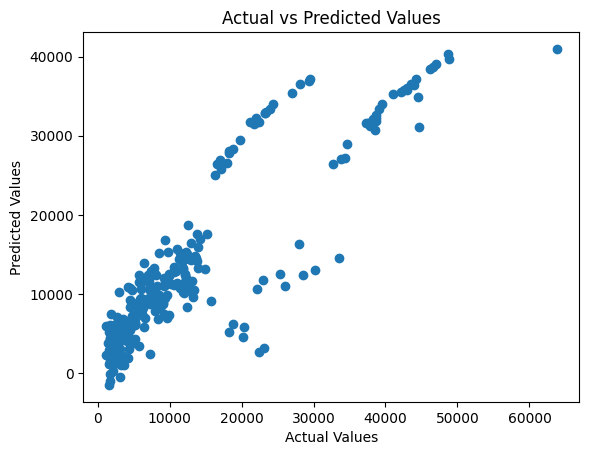

In [ ]:
# Predict the results
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('R2 Score: ', r2)

# Plot the actual values versus the predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

